In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from ConfusionMatrix import ConfusionMatrix

from matplotlib import rc
rc('font',**{'family':'serif','sans-serif':['Computer Modern Sans serif']})
rc('text', usetex=True)

In [2]:
labels = np.load('./Plots/labels_CM_subset.npy', allow_pickle=True)

In [3]:
cm_filename1 = 'confusion_matrix_model_fine_tune_VGG16_no_edge_frames_2020-01-25-16:03:08_subset'
cm_filename2 = 'confusion_matrix_model_fine_tune_VGG16_no_edge_frames_2020-01-24-03:03:13_subset'

In [4]:
cm1 = ConfusionMatrix(labels, 
                     cm_file='./Confusion_Matrix/' + cm_filename1 + '.npy')
cm2 = ConfusionMatrix(labels, 
                     cm_file='./Confusion_Matrix/' + cm_filename2 + '.npy')

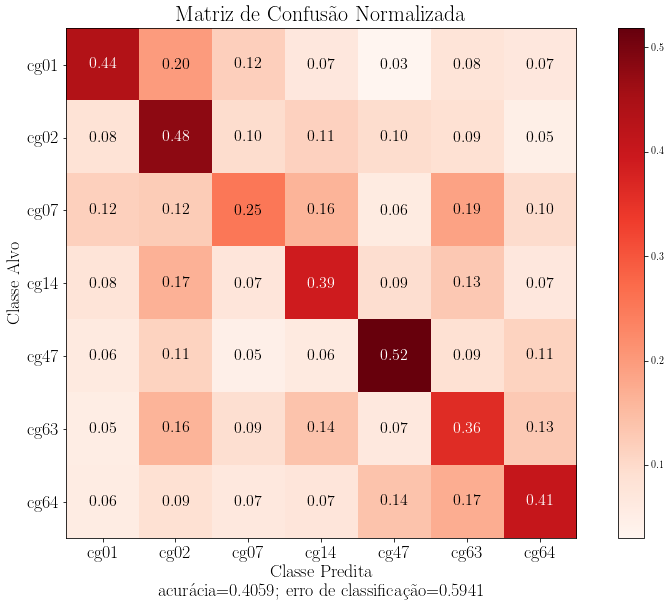

In [5]:
cm1.plot_figure(rotation=0, fig_name=cm_filename1)

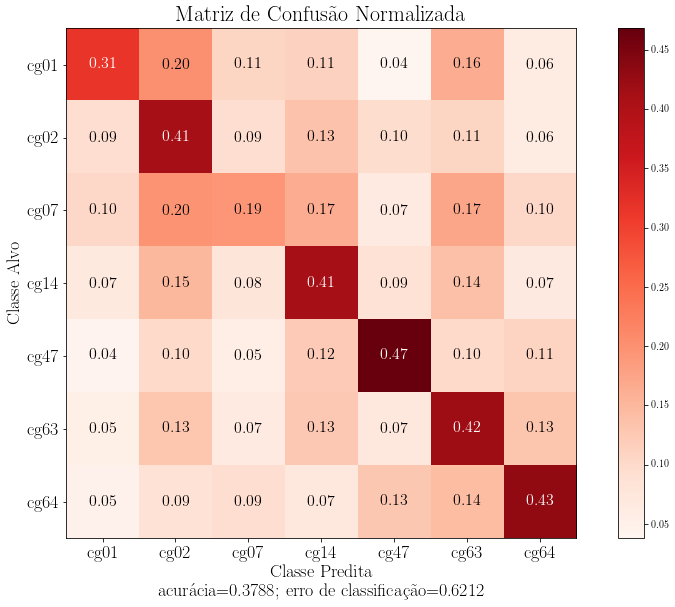

In [6]:
cm2.plot_figure(rotation=0)

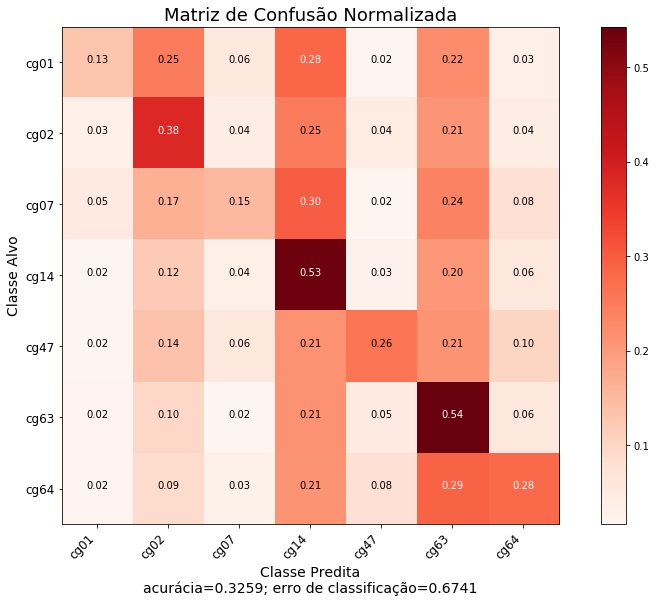

In [4]:
cm.plot_figure()

In [19]:
cm.saveFigure(figname='confusion_matrix_model_2020-01-22-01:50:34')

<Figure size 432x288 with 0 Axes>

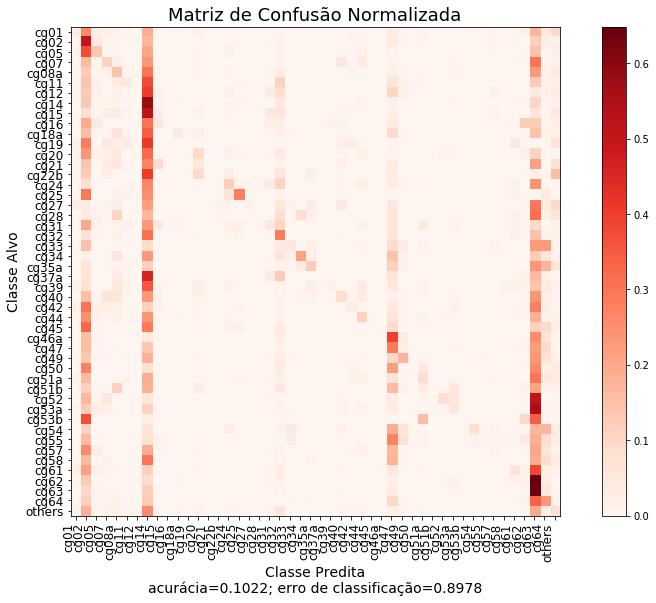

<Figure size 432x288 with 0 Axes>

In [29]:
plot_confusion_matrix(cm, df_annot['classe'].astype('category').cat.categories.values, figname='confusion_matrix_model_2020_01_20_48_classes', normalize=True, figsize=(12,8))